In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/chad.csv')
df.head()

,comment,reply
0,Well I have good news and bad news.\n\nGood ne...,Dammit
1,"We found him, but it was too late",Right
2,We gotten boys,Gottem
3,"Fucking finally, We found him boys",Now when we have found him it's time for Waldo...
4,"Our years of searching him is over, we can liv...",Finally


In [ ]:
df.describe()

,comment,reply
count,2614,2614
unique,2501,2522
top,[deleted],Lol
freq,30,19


In [ ]:
df=df[df['comment']!='[deleted]']
df.describe()

,comment,reply
count,2584,2584
unique,2500,2493
top,Lol,Lol
freq,21,18


In [ ]:
df

,comment,reply
0,Well I have good news and bad news.\n\nGood ne...,Dammit
1,"We found him, but it was too late",Right
2,We gotten boys,Gottem
3,"Fucking finally, We found him boys",Now when we have found him it's time for Waldo...
4,"Our years of searching him is over, we can liv...",Finally
...,...,...
2609,And the other!,The one right next to that one
2610,The one right next to that one,That thing over there ^
2611,How to kill a random redditor please ?,I think that’s illegal but I’d have to check
2612,"The second one is a uni-corn, as a fellow corn...",Good to know


In [ ]:
import re
from bs4 import BeautifulSoup

def clean_tweet(tweet):
    # Remove @mentions
    text = re.sub(r'@[A-Za-z0-9\']+', '', tweet)
    # Remove HTML tags
    text = BeautifulSoup(text, 'lxml').get_text()
    # Remove URLs
    text = re.sub(r'https?://[A-Za-z0-9. ]+(/[A-Za-z0-9]+)*', '', text)
    # Remove non-alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)
    # Remove 'RT' (retweet) tag
    text = re.sub(r'\bRT\b', '', text)
    # Replace 'nan' with a space
    text = re.sub(r'\bnan\b', ' ', text)
    # Replace newlines with spaces
    text = text.replace('\n', ' ')
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['comment']=df['comment'].apply(clean_tweet)
df['reply']=df['reply'].apply(clean_tweet)

<ipython-input-47-772adf23fcdf>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()
<ipython-input-47-772adf23fcdf>:8: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()


In [ ]:
df

,comment,reply
0,Well I have good news and bad news Good news W...,Dammit
1,We found him but it was too late,Right
2,We gotten boys,Gottem
3,Fucking finally We found him boys,Now when we have found him it s time for Waldo...
4,Our years of searching him is over we can live...,Finally
...,...,...
2609,And the other,The one right next to that one
2610,The one right next to that one,That thing over there
2611,How to kill a random redditor please,I think that s illegal but I d have to check
2612,The second one is a uni corn as a fellow corn ...,Good to know


In [ ]:
clean_tweet(df.iloc[0,0])

'Well I have good news and bad news Good news Waldo is dead Bad news that is just one out of million of his clones'

In [ ]:
data=pd.DataFrame()
data.head()

""


In [ ]:
data['data'] = df['comment'] + ' -> ' + df['reply']
data.head()

,data
0,Well I have good news and bad news Good news W...
1,We found him but it was too late -> Right
2,We gotten boys -> Gottem
3,Fucking finally We found him boys -> Now when ...
4,Our years of searching him is over we can live...


In [ ]:
data.to_csv('data.csv',index=False)

In [ ]:
def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
with open('/content/datac.txt') as story:
  story_data = story.read()

In [ ]:
# print(story_data)

In [ ]:
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

# print(split_data) 

In [ ]:
split_data.pop(0)


'data'

In [ ]:
# split_data

In [ ]:
final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  final += '\n' + line

# print(final)

In [ ]:
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
# print(final_data)

In [ ]:
final_data = [x for x in final_data if x != '']
# print(final_data)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

In [ ]:
# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
# print(vocab_size)

1720
{'the': 1, 'to': 2, 'a': 3, 'and': 4, 'it': 5, 'that': 6, 'of': 7, 'i': 8, 'is': 9, 'you': 10, 't': 11, 'they': 12, 's': 13, 'was': 14, 'japan': 15, 'in': 16, 'for': 17, 'but': 18, 'not': 19, 'this': 20, 'on': 21, 'have': 22, 'us': 23, 'like': 24, 'be': 25, 'would': 26, 'them': 27, 'what': 28, 'just': 29, 'we': 30, 'as': 31, 'no': 32, 'are': 33, 'with': 34, 'if': 35, 'about': 36, 'all': 37, 'so': 38, 'or': 39, 'their': 40, 'at': 41, 'were': 42, 'your': 43, 'did': 44, 'because': 45, 'can': 46, 'he': 47, 'japanese': 48, 'war': 49, 'had': 50, 'know': 51, 'how': 52, 'nuclear': 53, 'one': 54, 'when': 55, 'do': 56, 're': 57, 'my': 58, 'nukes': 59, 'from': 60, 'surrender': 61, 'don': 62, 'also': 63, 'civilians': 64, 'some': 65, 'm': 66, 'bombs': 67, 'bombing': 68, 'other': 69, 'make': 70, 'people': 71, 've': 72, 'now': 73, 'time': 74, 'point': 75, 'by': 76, 'more': 77, 'who': 78, 'there': 79, 'see': 80, 'an': 81, 'up': 82, 'america': 83, 'out': 84, 'his': 85, 'over': 86, 'think': 87, 'on

In [ ]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

# print(input_seq)

In [ ]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

326
[[  0   0   0 ...   0 110   8]
 [  0   0   0 ... 110   8  22]
 [  0   0   0 ...   8  22 125]
 ...
 [  0   0   0 ...  43 544  13]
 [  0   0   0 ... 544  13   3]
 [  0   0   0 ...  13   3 977]]


In [ ]:
# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0 110]
 [  0   0   0 ...   0 110   8]
 [  0   0   0 ... 110   8  22]
 ...
 [  0   0   0 ... 544  43 544]
 [  0   0   0 ...  43 544  13]
 [  0   0   0 ... 544  13   3]]
labels: [  8  22 125 ...  13   3 977]


In [ ]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
r = model.fit(xs, ys, batch_size=32, epochs=100, use_multiprocessing=True, workers=-1)



Epoch 1/100
268/268 [==============================] - 68s 209ms/step - loss: 6.5330 - accuracy: 0.0414
Epoch 2/100
268/268 [==============================] - 40s 151ms/step - loss: 6.3172 - accuracy: 0.0450
Epoch 3/100
268/268 [==============================] - 36s 134ms/step - loss: 6.1649 - accuracy: 0.0449
Epoch 4/100
268/268 [==============================] - 36s 135ms/step - loss: 6.0152 - accuracy: 0.0459
Epoch 5/100
268/268 [==============================] - 35s 129ms/step - loss: 5.8165 - accuracy: 0.0613
Epoch 6/100
268/268 [==============================] - 34s 128ms/step - loss: 5.5974 - accuracy: 0.0705
Epoch 7/100
268/268 [==============================] - 34s 125ms/step - loss: 5.4110 - accuracy: 0.0799
Epoch 8/100
268/268 [==============================] - 33s 124ms/step - loss: 5.2227 - accuracy: 0.0872
Epoch 9/100
268/268 [==============================] - 33s 124ms/step - loss: 5.0243 - accuracy: 0.0961
Epoch 10/100
268/268 [==============================] - 33s 123m

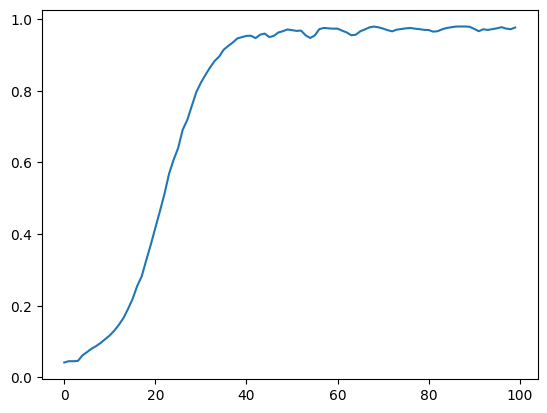

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [ ]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [ ]:
seed_text = 'I wish i could kill someone right now '
next_words = 10

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 32ms/step
I wish i could kill someone right now  norwegians of being funny little guys and their meme template


In [ ]:
seed_text = 'what do you know about computers? '
next_words = 20

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 33ms/step
what do you know about computers?  this yeah he has been making live action movies in which they race swap the main character people including myself


In [ ]:
seed_text = 'you know what? you dont make sense most of the time '
next_words = 20

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 32ms/step
you know what? you dont make sense most of the time  you dumb fucks know that every american school is different right i learned about everything our government did from manifest


In [ ]:
seed_text = 'so what should i do about it? Its useless to talk to you '
next_words = 20

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 38ms/step
so what should i do about it? Its useless to talk to you  reddit discord i m not typically bothered either you re farming upvotes their submarine has still have few pc with


In [ ]:
seed_text = ' you are such a piece of shit'
next_words = 20

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 38ms/step
 you are such a piece of shit it was too late right it s not like it does anything tho even if they took it away it


In [ ]:
# model.save('chad_generator.h5')